# TP 3

output: str

1-9
+-/*

in: 15
out: 3*5-8/4+2

In [189]:
numbers = set(range(2, 10))
operations = ["+", "-", "*"]

numbers_with_division = [1, 2, 3, 4]


def get_tuple(value: list[int]) -> tuple[int, int]:
    res = []

    for i in value:
        for j in value:
            if i != j:
                res.append((i, j))

    return res


def get_multiplier(value: int) -> int:
    return max(2, int(value / 10))


def get_str(value: int):
    is_positive = value > 0
    multiplier = get_multiplier(value)
    ending_num = 1 if is_positive else 2

    # Check if we can avoid the unnecessary loop
    # j = int(value / 10)

    left_numbers = numbers - set([multiplier, ending_num])
    for i in left_numbers:
        tuples = get_tuple(left_numbers - set([i]))

        for num1, num2 in tuples:
            result = (
                f"{multiplier}*{i}+{num1}-{num2}/{ending_num}"
                if is_positive
                else f"{num1}/{num2}-{multiplier}*{i}+{ending_num}"
            )

            if eval(result) == value:
                return result

    return None


in_value = 10
out = "2*1-9/1+2"


print("MIN", eval("4/2-9*8+1"))
print("MAX", eval("9*8/1+7-2"))

res = get_str(32)
print(res)

MIN -69.0
MAX 77.0
3*9+7-2/1


In [190]:
asd = list(range(0, 77))

results = [(x, get_str(x)) for x in asd]

# Best so far:
# - 36 not possible
# - 64 possible

not_possible = [x for x,y in results if y == None]
print('not_possible', len(not_possible), not_possible)

possible = [(x,y) for x,y in results if y != None]
print('possible', len(possible), possible)

not_possible 44 [0, 24, 25, 26, 27, 28, 29, 34, 35, 36, 37, 38, 39, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
possible 33 [(1, '2*3+4-9/1'), (2, '2*3+4-8/1'), (3, '2*3+4-7/1'), (4, '2*3+4-6/1'), (5, '2*3+4-5/1'), (6, '2*4+3-5/1'), (7, '2*3+5-4/1'), (8, '2*3+6-4/1'), (9, '2*3+7-4/1'), (10, '2*3+8-4/1'), (11, '2*3+9-4/1'), (12, '2*4+7-3/1'), (13, '2*4+8-3/1'), (14, '2*4+9-3/1'), (15, '2*5+8-3/1'), (16, '2*5+9-3/1'), (17, '2*6+8-3/1'), (18, '2*6+9-3/1'), (19, '2*7+8-3/1'), (20, '2*7+9-3/1'), (21, '2*8+9-4/1'), (22, '2*8+9-3/1'), (23, '2*9+8-3/1'), (30, '3*9+5-2/1'), (31, '3*8+9-2/1'), (32, '3*9+7-2/1'), (33, '3*9+8-2/1'), (40, '4*9+6-2/1'), (41, '4*9+7-2/1'), (42, '4*9+8-2/1'), (50, '5*9+7-2/1'), (51, '5*9+8-2/1'), (60, '6*9+8-2/1')]


In [296]:
from itertools import permutations

numbers = list(range(1, 10))
operations = ["+", "-", "*", "/"]
invalid_operations = ["/5", "/6", "/7", "/8", "/9"]

operations_permutations = list(permutations(operations))
numbers_permutations = list(permutations(numbers, 5))

def is_invalid_exp(exp: str) -> bool: 
    return any(op in exp for op in invalid_operations)

def get_str_brute_force(value: int):
    for n1, n2, n3, n4, n5 in numbers_permutations:
        for op1, op2, op3, op4 in operations_permutations:
            res = f"{n1}{op1}{n2}{op2}{n3}{op3}{n4}{op4}{n5}"

            if is_invalid_exp(res):
                continue

            if eval(res) == value:
                return res

    return None

res = get_str_brute_force(72)
print(res)

2-6/3+8*9


In [270]:
test_set = list(range(-69, 77))

results = [(x, get_str_brute_force(x)) for x in test_set]

not_possible = [x for x,y in results if y == None]
print('not_possible', len(not_possible), not_possible)

possible = [(x,y) for x,y in results if y != None]
print('possible', len(possible), possible)

not_possible 0 []
possible 146 [(-69, '6/3-9*8+1'), (-68, '1+6/2-8*9'), (-67, '4/2-9*8+3'), (-66, '2/1+4-8*9'), (-65, '6/3-9*8+5'), (-64, '2/1+6-8*9'), (-63, '7-9*8+6/3'), (-62, '3/1+7-8*9'), (-61, '7-9*8+4/1'), (-60, '1+4/2-7*9'), (-59, '8/4-9*7+2'), (-58, '1-7*9+8/2'), (-57, '6/3-9*7+4'), (-56, '2/1+5-7*9'), (-55, '8/4-9*7+6'), (-54, '3/1+6-7*9'), (-53, '8-9*7+6/3'), (-52, '1+6/2-7*8'), (-51, '9/3-8*7+2'), (-50, '2/1+4-7*8'), (-49, '9/3-8*7+4'), (-48, '2/1+4-6*9'), (-47, '9/3-8*7+6'), (-46, '3/1+5-6*9'), (-45, '9-8*7+6/3'), (-44, '1-6*8+9/3'), (-43, '9-8*7+4/1'), (-42, '1+4/2-5*9'), (-41, '9-8*7+6/1'), (-40, '9/3-8*6+5'), (-39, '8-9*6+7/1'), (-38, '9/3-8*6+7'), (-37, '9-8*6+4/2'), (-36, '9-8*6+3/1'), (-35, '9-8*6+4/1'), (-34, '9-8*6+5/1'), (-33, '9/3-8*5+4'), (-32, '9-8*6+7/1'), (-31, '9+8/4-7*6'), (-30, '9-7*6+3/1'), (-29, '9-8*5+6/3'), (-28, '9-8*5+6/2'), (-27, '9-8*5+4/1'), (-26, '9/3-7*5+6'), (-25, '9+8-7*6/1'), (-24, '9-8*5+7/1'), (-23, '9-7*5+6/2'), (-22, '9+8/2-7*5'), (-21, '9

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


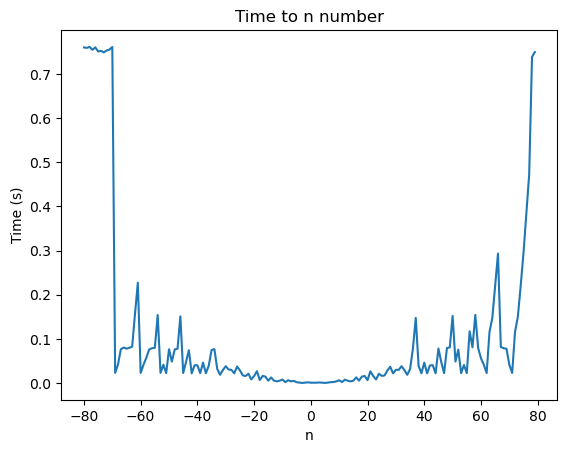

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
import numpy as np

execution_time = []
input_sizes = list(range(-80, 80))

for n in input_sizes:
    execution_time.append(timeit.timeit(lambda: get_str_brute_force(n), number=1))

sns.lineplot(x=input_sizes, y=execution_time)

plt.xlabel("n")
plt.ylabel("Time (s)")
plt.title("Time to n number")

plt.show()

In [243]:
from itertools import permutations
import numpy as np

numbers = np.array(range(1, 10))
operations = np.array(["+", "-", "*", "/"])
operations_permutations = np.array(list(permutations(operations)))
# numbers_permutations = np.array(list(permutations(numbers, 5)))


def get_str_brute_force_np(value: int):
    selected = []

    for n1 in numbers:
        selected.append(n1)
        for n2 in numbers[~np.isin(numbers, selected)]:
          selected.append(n2)
          for n3 in numbers[~np.isin(numbers, selected)]:
            selected.append(n3)
            for n4 in numbers[~np.isin(numbers, selected)]:
              selected.append(n4)
              for n5 in numbers[~np.isin(numbers, selected)]:
                for op1, op2, op3, op4 in operations_permutations:
                  result = (
                    f"{n1}{op1}{n2}{op2}{n3}{op3}{n4}{op4}{n5}"
                  )

                  if eval(result) == value:
                    return result

              selected.remove(n4)
            selected.remove(n3)
          selected.remove(n2)
        selected.remove(n1)

    # for n1, n2, n3, n4, n5 in numbers_permutations:
    #     for op1, op2, op3, op4 in operations_permutations:
    #         result = f"{n1}{op1}{n2}{op2}{n3}{op3}{n4}{op4}{n5}"
    #         if eval(result) == value:
    #             return result

    return None


res = get_str_brute_force_np(32)
print(res)

1+5*7-8/2


In [245]:
test_set = list(range(-69, 77))

results = [(x, get_str_brute_force_np(x)) for x in test_set]

not_possible = [x for x,y in results if y == None]
print('not_possible', len(not_possible), not_possible)

possible = [(x,y) for x,y in results if y != None]
print('possible', len(possible), possible)

not_possible 0 []
possible 146 [(-69, '1+4/2-8*9'), (-68, '1+6/2-8*9'), (-67, '2/1+3-8*9'), (-66, '2/1+4-8*9'), (-65, '2/1+5-8*9'), (-64, '2/1+6-8*9'), (-63, '2/1+7-8*9'), (-62, '3/1+7-8*9'), (-61, '4/1+7-8*9'), (-60, '1+4/2-7*9'), (-59, '1+6/2-7*9'), (-58, '1-7*9+8/2'), (-57, '2/1+4-7*9'), (-56, '2/1+5-7*9'), (-55, '2/1+6-7*9'), (-54, '3/1+6-7*9'), (-53, '1+4/2-7*8'), (-52, '1+6/2-7*8'), (-51, '1+4/2-6*9'), (-50, '2/1+4-7*8'), (-49, '1-6*9+8/2'), (-48, '2/1+4-6*9'), (-47, '2/1+5-6*9'), (-46, '3/1+5-6*9'), (-45, '1+4/2-6*8'), (-44, '1-6*8+9/3'), (-43, '2/1+3-6*8'), (-42, '1+4/2-5*9'), (-41, '1-5*9+6/2'), (-40, '1-5*9+8/2'), (-39, '1+4/2-6*7'), (-38, '1-6*7+9/3'), (-37, '1+4/2-5*8'), (-36, '1-5*8+6/2'), (-35, '2/1+3-5*8'), (-34, '2/1+4-5*8'), (-33, '1-4*9+6/3'), (-32, '1+3-8/2*9'), (-31, '1+4-8/2*9'), (-30, '1-5*7+8/2'), (-29, '1-4*8+6/3'), (-28, '1-4*8+6/2'), (-27, '1+4/2-5*6'), (-26, '1-5*6+9/3'), (-25, '1-4*7+6/3'), (-24, '1+3-7/2*8'), (-23, '1+3-6/2*9'), (-22, '1-3*9+8/2'), (-21, '1